In [1]:
# This notebook is to practice dimensionality reduction using pca
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LassoCV

In [2]:
# import the dataset
housing = fetch_california_housing(return_X_y=True, as_frame=True)
X, y = housing[0], housing[1]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('reg', LinearRegression())
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [5]:
# give the r2_score
pipe.score(X_test, y_test)

0.027403043911546576

In [6]:
# give the mean absolute error
mean_absolute_error(y_test, y_pred)

0.9003043517541229

<AxesSubplot:>

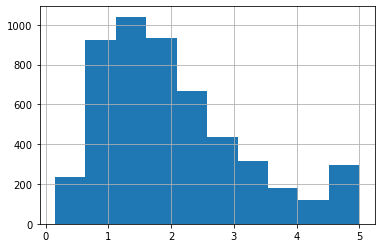

In [7]:
# If the data only explains 2.7% of the variation and the mean absolute 
# error is 0.9 on a dataset where the range of the response is between
# 0 and 5, we can say that the pca gets rid of all info that we could use
# to linearly fit the model successfully.  If we comment out the pca, the 
# r2_score is 59% and the mean_absolute_error is 0.54.
y_test.hist()